Source : http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler

In [9]:
import os
#path = os.getcwd()+'/ex2data1.txt' or
path = '../EX_3/ex2data1.txt'
df = pd.read_csv(path, header = None, names = ['Exam1', 'Exam2', 'Admitted'])#header = None)#,
df.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [12]:
#get scatter plot of two scores
#positive = df[df.Admitted.isin([1])] or
positive = df[df.Admitted == 1]
negative = df[~df.Admitted.isin([1])]#df[df.Admitted.isin([0])]
positive.head()

,Exam1,Exam2,Admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


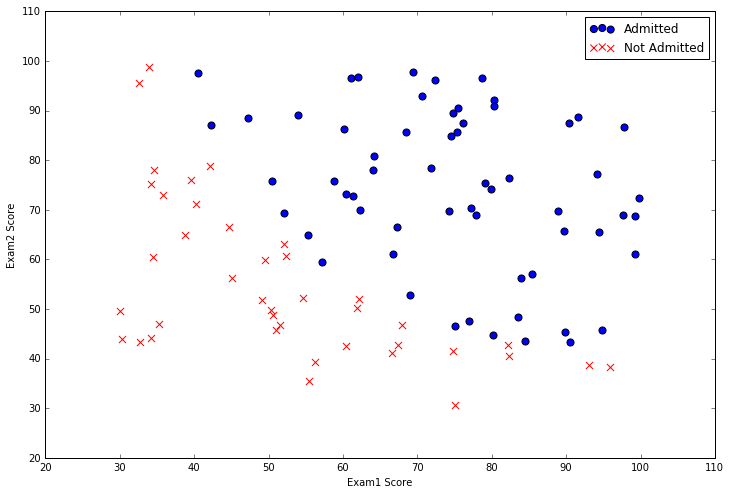

In [14]:
fig, ax = plt.subplots(figsize = (12, 8))#this returns tuple which is handy and one uses this though it is single plot
ax.scatter(positive.Exam1, positive.Exam2, s=50, c='b', marker = 'o', label = 'Admitted')
ax.scatter(negative.Exam1, negative.Exam2, s=50, c='r', marker = 'x', label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')

In [19]:
#is exam1 and exam2 variables correlated?But as the number of features are only 2 and also the number of samples are
#good in number, so even if correlation exists it is ok.

#let us apply regression
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#X.head()

In [24]:
#split the data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
#should the data be standardized, how does the results/computation differ because of standardization?
#without standardization
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

('Coefficient of each feature:', array([[ 0.03413414,  0.0220972 ]]))
('Training accuracy:', 0.81428571428571428)
('Test accuracy:', 0.90000000000000002)


In [ ]:
#what is the summary and interpretation?